In [14]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import math
from math import log

In [15]:
a= 10*np.random.rand()
b= 10*np.random.rand()
print(a)
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

0.7025504753849077


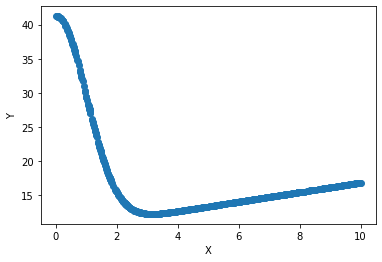

In [16]:
## Creating Dataset
x = np.random.uniform(0,10,750)
y =  a*x + b + 10*normal_dist(x,0,1)
plt.plot(x,y,'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [17]:
def h(x,theta):
	return x@theta
    
def cost_function_ridge(x, y, theta, lamda):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0]) + lamda*(theta.T@theta)/(2*y.shape[0])

def cost_function_lasso(x, y, theta, lamda):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0]) + lamda*((theta.abs()).sum())/(2*y.shape[0])

def cost_function_elastic(x, y, theta, lamda):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0]) + lamda*(theta.T@theta)/(2*y.shape[0]) + lamda*((theta.abs()).sum())/(2*y.shape[0])



In [18]:
def gradient_descent_ridge(x, y, theta, learning_rate, num_epochs, lamda):
	m = x.shape[0]
	J_all = []
	theta_values=[[]]
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y)) + (lamda/m)*theta
		theta = theta - (learning_rate)*cost_ 
		theta.iloc[-1]=  theta.iloc[-1] - (learning_rate)*(lamda/m)*theta.iloc[-1]
		theta_values.append(theta)
		J_all.append(cost_function_ridge(x, y, theta, lamda))

	return theta, J_all , theta_values

In [19]:
def gradient_descent_lasso(x, y, theta, learning_rate, num_epochs, lamda):
	m = x.shape[0]
	J_all = []
	theta_values=[[]]
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y)) + (lamda/m)*np.sign(theta)
		theta = theta - (learning_rate)*cost_ 
		theta.iloc[-1]=  theta.iloc[-1] - (learning_rate)*(lamda/m)*np.sign(theta.iloc[-1])
		theta_values.append(theta)
		J_all.append(cost_function_ridge(x, y, theta, lamda))

	return theta, J_all , theta_values

In [20]:
def gradient_descent_elastic(x, y, theta, learning_rate, num_epochs, lamda):
	m = x.shape[0]
	J_all = []
	theta_values=[[]]
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y)) + (lamda/m)*np.sign(theta) + (lamda/m)*theta
		theta = theta - (learning_rate)*cost_ 
		theta.iloc[-1]=  theta.iloc[-1] - (learning_rate)*(lamda/m)*np.sign(theta.iloc[-1]) - (learning_rate)*(lamda/m)*theta.iloc[-1]
		theta_values.append(theta)
		J_all.append(cost_function_ridge(x, y, theta, lamda))

	return theta, J_all , theta_values

For Ridge Regularization

In [21]:
X_data = pd.DataFrame(x)
Y_data = pd.DataFrame(y)
degree =10
for i in range(degree):
    X_data[i] = X_data[0].apply(lambda x1: x1**(i+1))
X_data[degree] = 1 
lamda_arr = [0.01, 0.1, 1, 10, 100, 1000]
losses = []
theta_store = [[[]]]
theta_best = pd.DataFrame(np.zeros(degree+1))
k = 6
for i in range(k):
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size= 1/k)
    theta = np.random.randn(degree+1)
    theta = pd.DataFrame(theta)
    theta_new, J_all, theta_values = gradient_descent_ridge(train_x, train_y, theta, learning_rate=0.1**19, num_epochs=20, lamda= lamda_arr[i])
    theta_store.append(theta_values)
    theta_best = theta_best + theta_new/k
    total_loss = cost_function_ridge(test_x,test_y,theta_new, lamda = lamda_arr[i])
    losses.append(int(total_loss.iloc[0]))


In [22]:
log_lamda = []
for i in range(k):
    log_lamda.append(log(lamda_arr[i]))

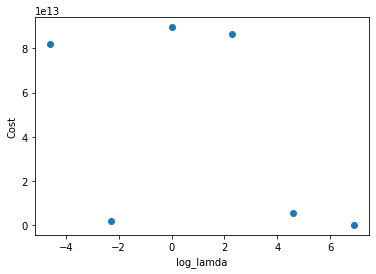

In [23]:
plt.plot(log_lamda,losses,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()

In [24]:
min_loss=losses[0]
best_lamda=lamda_arr[0]
for i in range(1,k):
    if losses[i]<min_loss:
        min_loss=losses[i]
        best_lamda=lamda_arr[i]
print("The best lamda for ridge regularization : ", best_lamda)
print("value for cost function for ridge regularization: ", cost_function_ridge(test_x, test_y, theta_best, lamda = best_lamda))

The best lamda for ridge regularization :  1000
value for cost function for ridge regularization:                0
0  4.480845e+12


For Lasso Regression


              0
0  7.888711e+13
              0
0  9.118765e+12
              0
0  5.099010e+13
              0
0  1.156306e+13
              0
0  1.239728e+14
              0
0  2.792175e+13


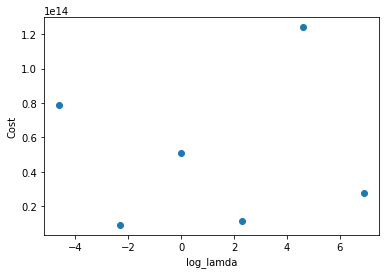

The best lamda for the lasso regularizaion is : 0.1
The value of cost function for the best lamda for the lasso regularizaion is :               0
0  1.898744e+13


In [25]:
X_data = pd.DataFrame(x)
Y_data = pd.DataFrame(y)
degree =10
for i in range(degree):
    X_data[i] = X_data[0].apply(lambda x1: x1**(i+1))
X_data[degree] = 1 
lamda_arr = [0.01, 0.1, 1, 10, 100, 1000]
losses = []
theta_store = [[[]]]
k = 6
theta_best = pd.DataFrame(np.zeros(degree+1))
for i in range(k):
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size= 1/k)
    theta = np.random.randn(degree+1)
    theta = pd.DataFrame(theta)
    theta_new, J_all, theta_values = gradient_descent_lasso(train_x, train_y, theta, learning_rate=0.1**19, num_epochs=20, lamda= lamda_arr[i])
    theta_store.append(theta_values)
    theta_best = theta_best + theta_new/k
    total_loss = cost_function_lasso(test_x,test_y,theta_new, lamda = lamda_arr[i])
    print(total_loss)
    losses.append(int(total_loss.iloc[0]))

log_lamda = []
for i in range(k):
    log_lamda.append(log(lamda_arr[i]))
plt.plot(log_lamda,losses,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=losses[0]
best_lamda=lamda_arr[0]
for i in range(1,k):
    if losses[i]<min_loss:
        min_loss=losses[i]
        best_lamda=lamda_arr[i]
print("The best lamda for the lasso regularizaion is :", best_lamda)
print("The value of cost function for the best lamda for the lasso regularizaion is :", cost_function_lasso(test_x, test_y, theta_best, lamda = best_lamda))


For Elastic Regression

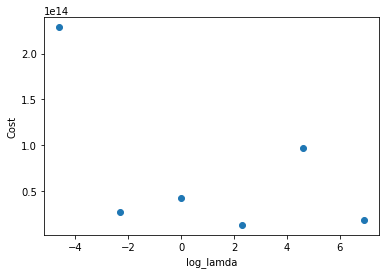

The best lambda for elastic regularization 10
Value of cost function for elastic regularization               0
0  1.778005e+12


In [26]:
X_data = pd.DataFrame(x)
Y_data = pd.DataFrame(y)
degree =10
for i in range(degree):
    X_data[i] = X_data[0].apply(lambda x1: x1**(i+1))
X_data[degree] = 1 
lamda_arr = [0.01, 0.1, 1, 10, 100, 1000]
losses = []
theta_store = [[[]]]
k = 6
theta_best = pd.DataFrame(np.zeros(degree+1))
for i in range(k):
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size= 1/k)
    theta = np.random.randn(degree+1)
    theta = pd.DataFrame(theta)
    theta_new, J_all, theta_values = gradient_descent_elastic(train_x, train_y, theta, learning_rate=0.1**19, num_epochs=20, lamda= lamda_arr[i])
    theta_store.append(theta_values)
    theta_best = theta_best + theta_new/k
    total_loss = cost_function_elastic(test_x,test_y,theta_new, lamda = lamda_arr[i])
    losses.append(int(total_loss.iloc[0]))

log_lamda = []
for i in range(k):
    log_lamda.append(log(lamda_arr[i]))
plt.plot(log_lamda,losses,'o')
plt.xlabel("log_lamda")
plt.ylabel("Cost")
plt.show()
min_loss=losses[0]
best_lamda=lamda_arr[0]
for i in range(1,k):
    if losses[i]<min_loss:
        min_loss=losses[i]
        best_lamda=lamda_arr[i]
print("The best lambda for elastic regularization", best_lamda)
print("Value of cost function for elastic regularization", cost_function_elastic(test_x, test_y, theta_best, lamda = best_lamda))
